In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df=pd.read_csv('Iris.csv')

In [86]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [87]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [88]:
df.shape

(150, 6)

In [89]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [90]:
df.drop('Id',axis=1,inplace=True)

In [91]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [92]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [93]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='Species', ylabel='count'>

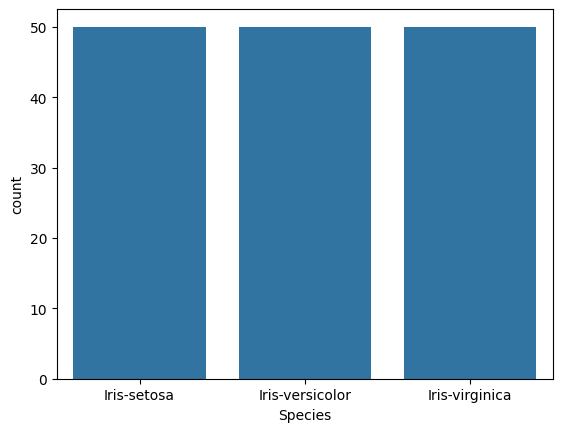

In [94]:
sns.countplot(x='Species',data=df)

In [95]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [96]:
x.ndim

2

In [97]:
y.ndim

1

In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.30,random_state=1)

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [100]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'

In [101]:
y_train

array(['Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa'], dtype=object)

In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        33
Iris-versicolor       0.89      0.94      0.92        35
 Iris-virginica       0.94      0.89      0.92        37

       accuracy                           0.94       105
      macro avg       0.94      0.94      0.94       105
   weighted avg       0.94      0.94      0.94       105



In [103]:
score=accuracy_score(y_test,y_pred)
score

0.9428571428571428

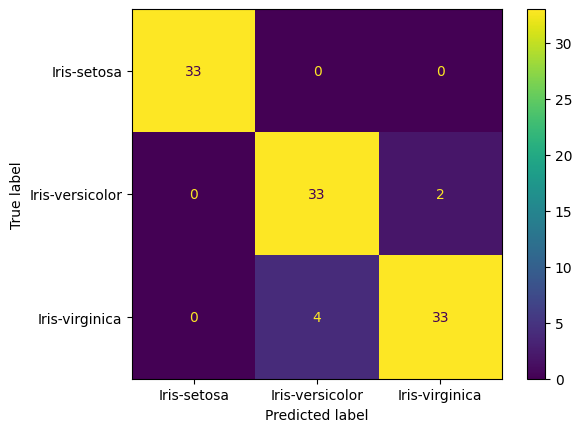

In [104]:
cm=confusion_matrix(y_test,y_pred)
lab=['Iris-setosa','Iris-versicolor','Iris-virginica']
cmd=ConfusionMatrixDisplay(cm,display_labels=lab)
cmd.plot()

[Text(0.4, 0.9, 'PetalWidthCm <= 0.304\nentropy = 1.576\nsamples = 45\nvalue = [17.0, 15.0, 13.0]\nclass = Iris-setosa'),
 Text(0.2, 0.7, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0, 0]\nclass = Iris-setosa'),
 Text(0.30000000000000004, 0.8, 'True  '),
 Text(0.6, 0.7, 'PetalLengthCm <= 0.816\nentropy = 0.996\nsamples = 28\nvalue = [0, 15, 13]\nclass = Iris-versicolor'),
 Text(0.5, 0.8, '  False'),
 Text(0.4, 0.5, 'PetalWidthCm <= 0.652\nentropy = 0.523\nsamples = 17\nvalue = [0, 15, 2]\nclass = Iris-versicolor'),
 Text(0.2, 0.3, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14, 0]\nclass = Iris-versicolor'),
 Text(0.6, 0.3, 'SepalLengthCm <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]\nclass = Iris-virginica'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = Iris-virginica'),
 Text(0.8, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 11]\nclass = Iris-virginica')]

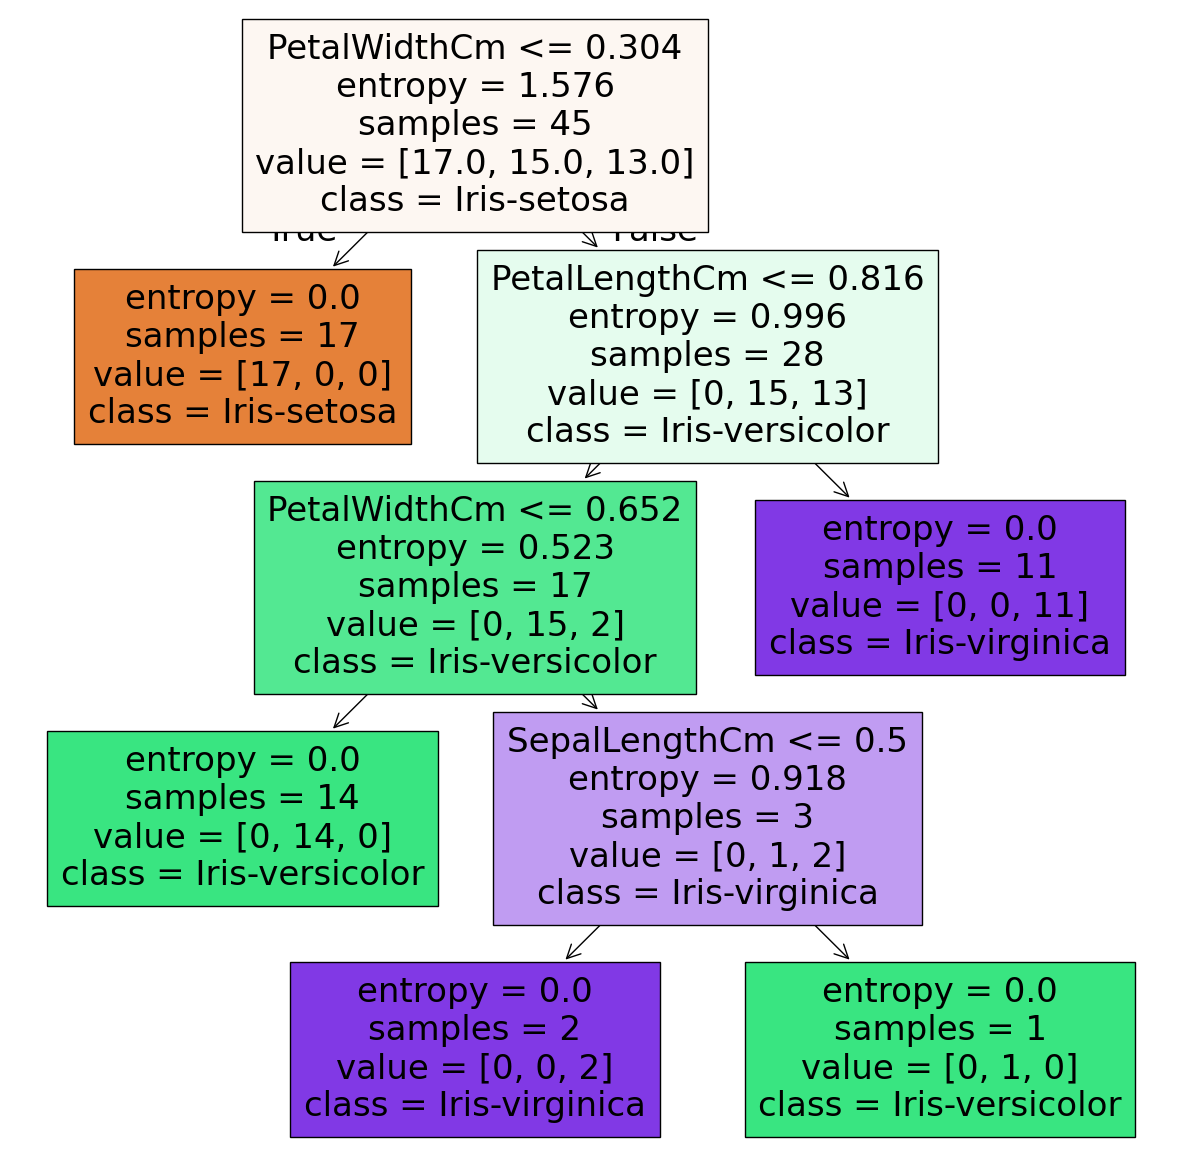

In [110]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(model,feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],filled=True)